#Predicting Instagram Post Impressions

# Introduction to Problem & Data

## Probelem Statment

Instagram has become one of the most influential social media platforms, with over a billion active users sharing millions of posts daily. The goal of this project is to develop a predictive model to estimate the Impressions (visibility) of social media posts based on engagement metrics such as Likes, Saves, Profile Visits, Follows, and Hashtag Count. By utilizing multiple regression models and machine learning techniques—including Multiple Linear Regression, K-Nearest Neighbors (KNN), Decision Trees, Random Forest, XGBoost, and Artificial Neural Networks (ANN)—the project aims to identify which metrics contribute most significantly to Impressions and evaluate the performance of different models. The insights gained from these models will help marketers, advertisers, social media influencers, and content creators optimize their social media strategies, tailor content to maximize reach and visibility, and improve engagement while also addressing challenges such as handling outliers and ensuring model generalization.

## Dataset Description:


Dataset Description
The dataset for this project was sourced from Kaggle, specifically the "Instagram Data" dataset by Amir Motefaker. It contains engagement metrics and metadata for Instagram posts, providing valuable information for analyzing and predicting the impressions of a post based on its features. The dataset consists of 119 rows and 13 columns, all of which are clean and non-null, requiring minimal preprocessing.

Key Features:

Impressions (Target Variable): Total number of times a post was viewed.
Likes, Saves, Comments, Shares: Engagement metrics representing user interactions with posts.

Profile Visits, Follows: Indicators of deeper user engagement and post influence.

From Home, From Hashtags, From Explore, From Other: Breakdown of where impressions originated.

Caption, Hashtags: Text-based features describing the content of the posts.

The dataset is relatively small, with only 119 records, but it provides a diverse set of features to explore the relationships between different engagement metrics and impressions. Due to the limited size of the dataset, model performance could be impacted, particularly for complex algorithms, which might benefit from additional data for training and validation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#  Create the .kaggle directory
!mkdir -p ~/.kaggle

# Copy kaggle.json to the .kaggle directory
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

# Verify the file
!ls ~/.kaggle

#  Set environment variable
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

#  Authenticate
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()

#Download the first dataset
api.dataset_download_files('amirmotefaker/instagram-data', path='.', unzip=True)

# Load the dataset into a DataFrame


# Adjust filename as needed after confirming the actual file name
data = pd.read_csv('Instagram data.csv', encoding='ISO-8859-1')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
kaggle.json
Dataset URL: https://www.kaggle.com/datasets/amirmotefaker/instagram-data


In [ ]:
# Load the dataset
df = data

In [ ]:


# Display the first few rows and basic information
print(df.head())




   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB
None


In [ ]:
print(df.isnull().sum())


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


Our dataset appears to have no missing values, which is excellent for our analysis.


I noticed that the dataset does not include a dedicated column for the number of hashtags per post. Instead, the "hashtags" column contains all the hashtags used in each post as a single string. To address this, we can create a new column that counts the number of hashtags in each post.

In [ ]:
# Create a function to count hashtags
def count_hashtags(text):
    return text.count('#')

# Add hashtag count as a feature
df['Hashtag_Count'] = df['Hashtags'].apply(count_hashtags)


In [ ]:
# Find the minimum and maximum for each specified column
columns_of_interest = ['Likes', 'Saves', 'Profile Visits', 'Follows', 'Hashtag_Count']
min_values = df[columns_of_interest].min()
max_values = df[columns_of_interest].max()

# Print the results
print("Minimum values for each column:")
print(min_values)

print("\nMaximum values for each column:")
print(max_values)


Minimum values for each column:
Likes             72
Saves             22
Profile Visits     4
Follows            0
Hashtag_Count     10
dtype: int64

Maximum values for each column:
Likes              549
Saves             1095
Profile Visits     611
Follows            260
Hashtag_Count       30
dtype: int64


The dataset I am working with contains data from 119 Instagram posts. The engagement metrics show a wide range, with the number of likes varying from 72 to 549, saves ranging from 22 to 1095, and profile visits spanning from 4 to 611. The number of follows for each post ranges from 0 to 260, while the hashtag count varies between 10 and 30. This diverse range of values provides a solid basis for exploring the relationship between post features and impressions, although the relatively small dataset size might limit the robustness of some machine learning models.

# Exploratory Data Analysis

In [ ]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Hashtag_Count
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,22
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,18
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,18
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,11
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,29


## Descriptive Statistics

In [ ]:
y=df['Impressions']


In [ ]:
print("Min Impressions:", y.min())


Min Impressions: 1941


In [ ]:
print("Max Impressions:", y.max())


Max Impressions: 36919


In [ ]:
print("Mean Impressions:", y.mean())


Mean Impressions: 5703.991596638655


In [ ]:
print("Variance of Impressions:",df['Impressions'].var())
print("Standard Deviation of Impressions:", df['Impressions'].std())

Variance of Impressions: 23462205.703318622
Standard Deviation of Impressions: 4843.780104765143


A high standard deviation suggests the possibility of outliers

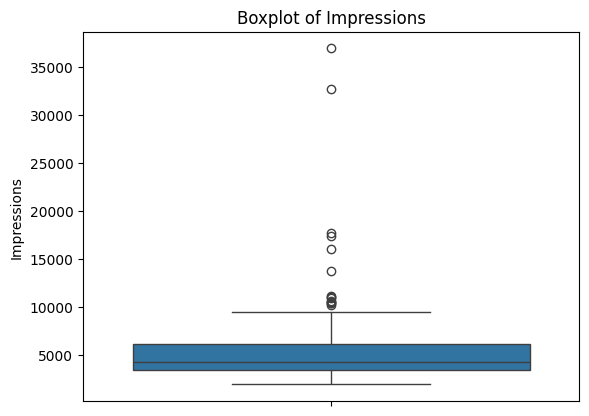

In [ ]:

sns.boxplot(y=df['Impressions'])
plt.title("Boxplot of Impressions")
plt.show()
Q1 = df['Impressions'].quantile(0.25)
Q3 = df['Impressions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# outliers = df[(df['Impressions']< lower_bound) | (df['Impressions'] > upper_bound)]
# print("Outliers:")
# print(outliers)


Text(0, 0.5, 'Frequency')

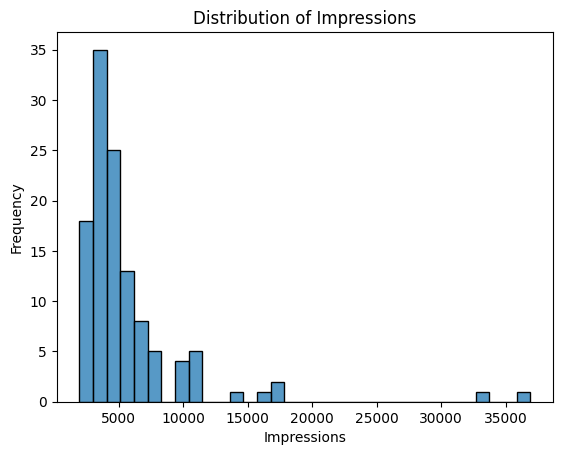

In [ ]:
#histogram of scores
df=data
sns.histplot(data = df, x = 'Impressions')
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')

The histogram reveals a right-skewed distribution of impressions, typical for social media metrics. Most posts cluster in the 2,000-7,000 range, with a peak around 3,000-4,000 impressions. The frequency sharply declines after 7,000, with few posts exceeding 15,000 impressions and rare cases reaching 30,000-35,000.

In our case, the variance and standard deviation of "Impressions" are relatively high, suggesting that there are some extreme values and could distort the model’s predictions.This non-normal distribution reflects the common pattern in social media where most content receives moderate engagement, while viral posts are infrequent.


Handling or removing outliers can help ensure that your model is not disproportionately influenced by extreme values, leading to more reliable and accurate results. Since outliers can distort the overall distribution of the data and affect model performance, I am removing them to improve the model's robustness. This step is optional, and you can choose to run the models with or without removing the outliers. If you prefer to include the outliers in your analysis, simply comment out the code provided below and rerun the program. For the sake of optimizing model performance, I have chosen to remove the outliers.

In [ ]:
df=df[(df['Impressions'] >= lower_bound) & (df['Impressions'] <= upper_bound)]
y=df['Impressions']

In [ ]:
print("Variance of Impressions:",y.var())
print("Standard Deviation of Impressions:", y.std())

Variance of Impressions: 2207881.48040293
Standard Deviation of Impressions: 1485.894168641539


 The standard deviation decreased significantly from  4843.78 to 1485.89

## Initial Visulaizations

Correlation Analysis:


In [ ]:
# Correlation analysis
data=df
correlation_matrix = df[['Impressions', 'Likes', 'Comments', 'Saves', 'Shares','Follows','Profile Visits' ]].corr()


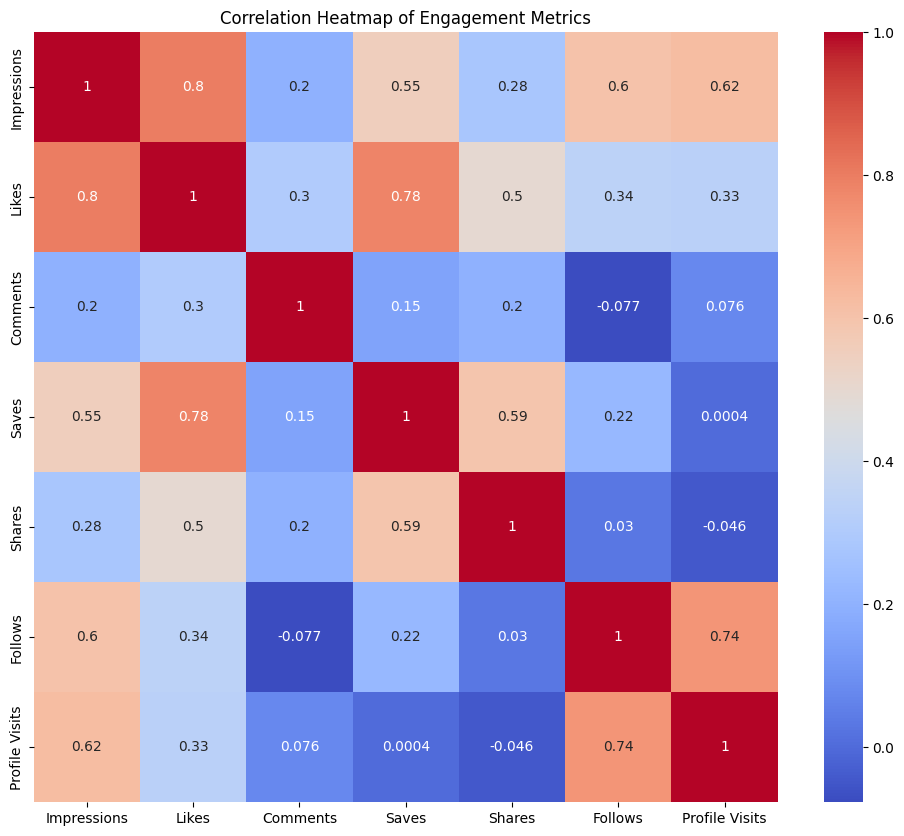

In [ ]:

# Visualizations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Engagement Metrics')
plt.show()

Explore Data Distribution:

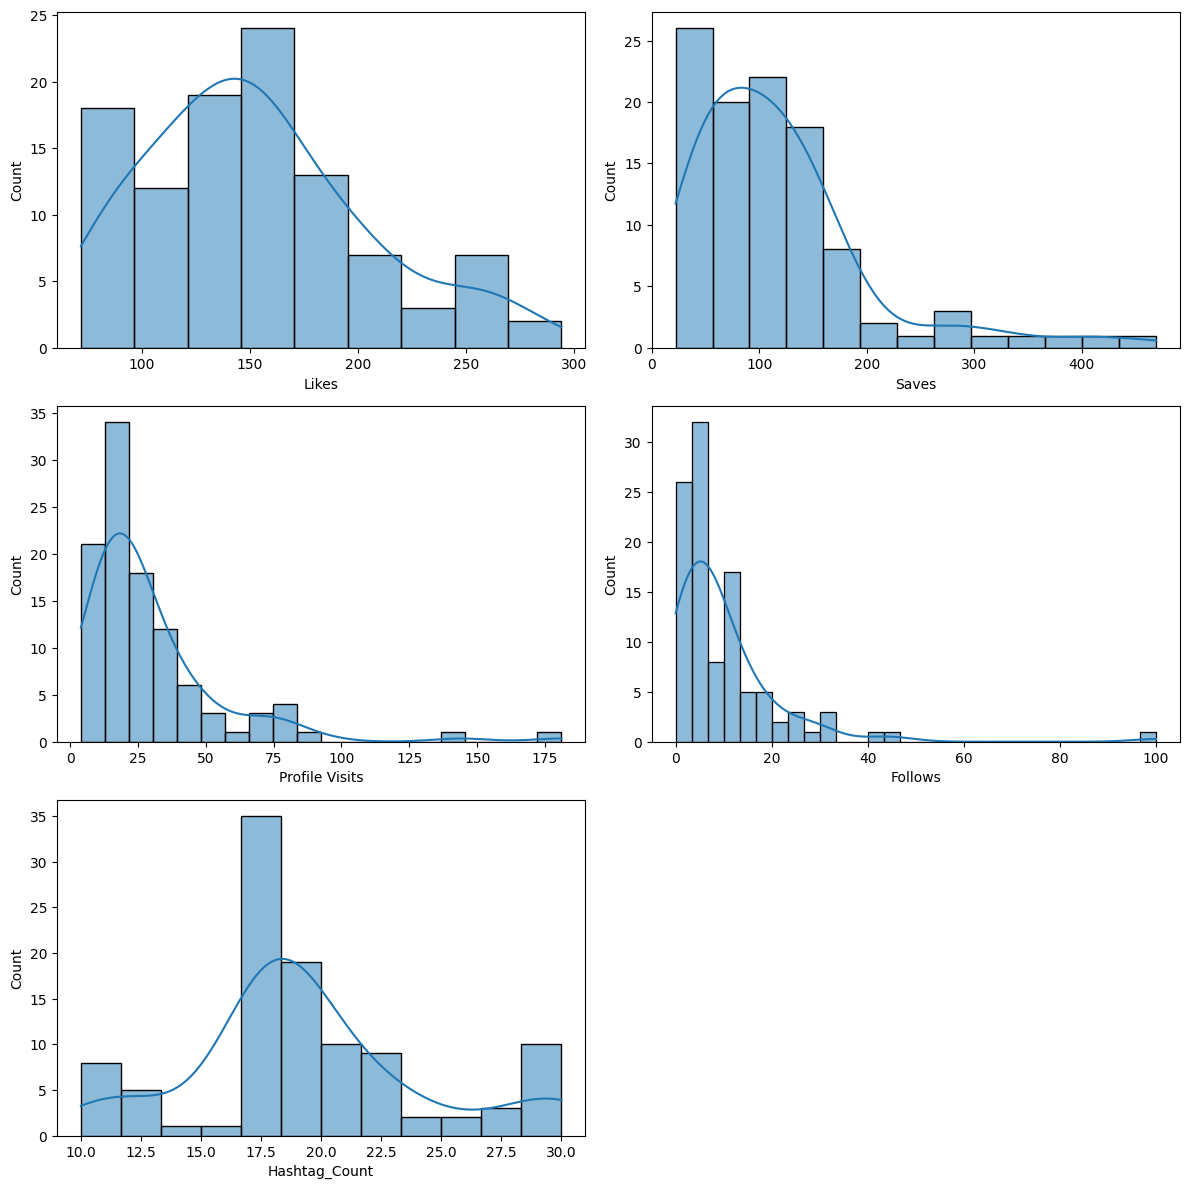

In [ ]:
# Distribution of key metrics
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot the distributions
sns.histplot(df['Likes'], kde=True, ax=axes[0, 0])
sns.histplot(df['Saves'], kde=True, ax=axes[0, 1])
sns.histplot(df['Profile Visits'], kde=True, ax=axes[1, 0])
sns.histplot(df['Follows'], kde=True, ax=axes[1, 1])
sns.histplot(df['Hashtag_Count'], kde=True, ax=axes[2, 0])

# Remove the empty subplot at [2, 1]
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


The graphs reveal right-skewed distributions for likes, saves, profile visits, and follows, with most data points concentrated at lower values and long tails extending to higher values, while the hashtag count distribution shows a more symmetric pattern with a peak around 17-20 hashtags per post.

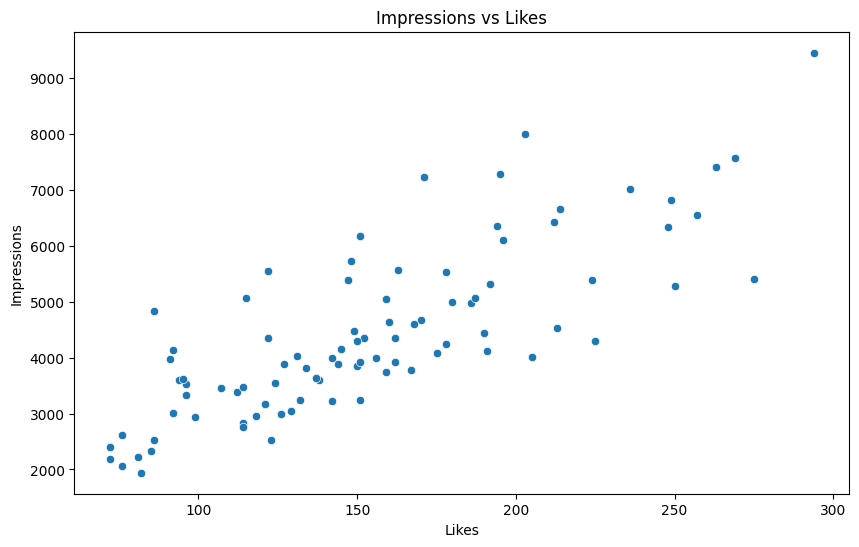

In [ ]:
# Scatter plot:  Likes vs Impressions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Impressions', data=df)
plt.title('Impressions vs Likes')
plt.show()

Impressions vs Likes shows a positive correlation, indicating that posts with more likes tend to receive higher impressions. However, the relationship is not perfectly linear, as evidenced by the wide spread of data points and several notable outliers with exceptionally high impressions (around 35,000) for their respective like counts.

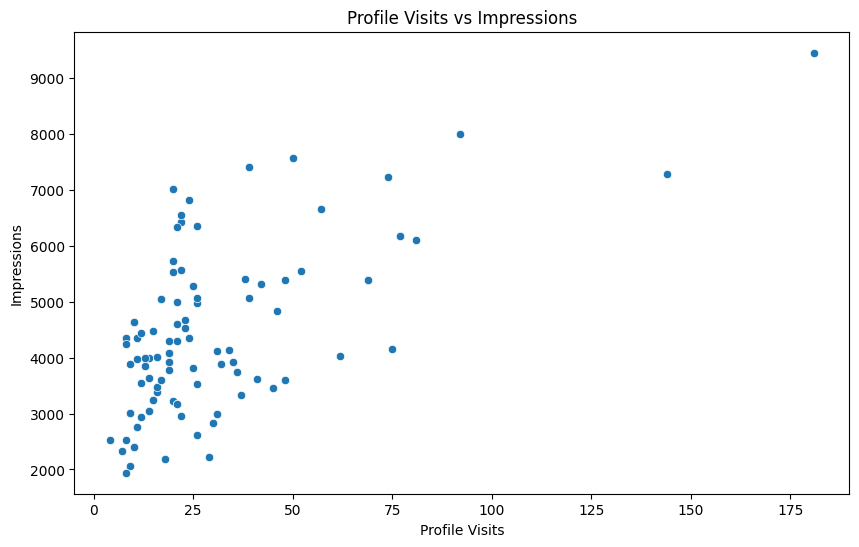

In [ ]:
# Profile Visits analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Profile Visits', y='Impressions', data=df)
plt.title('Profile Visits vs Impressions')
plt.show()

The scatter plot reveals a moderate positive correlation between Profile Visits and Impressions, with most data points clustered between 0-100 profile visits generating 2,000-7,000 impressions. There are notable outliers showing exceptional performance, particularly two posts that achieved around 35,000 impressions with different profile visit counts (around 150 and 600 visits respectively).

For the 'Hashtags' column, we can extract the number of hashtags used:

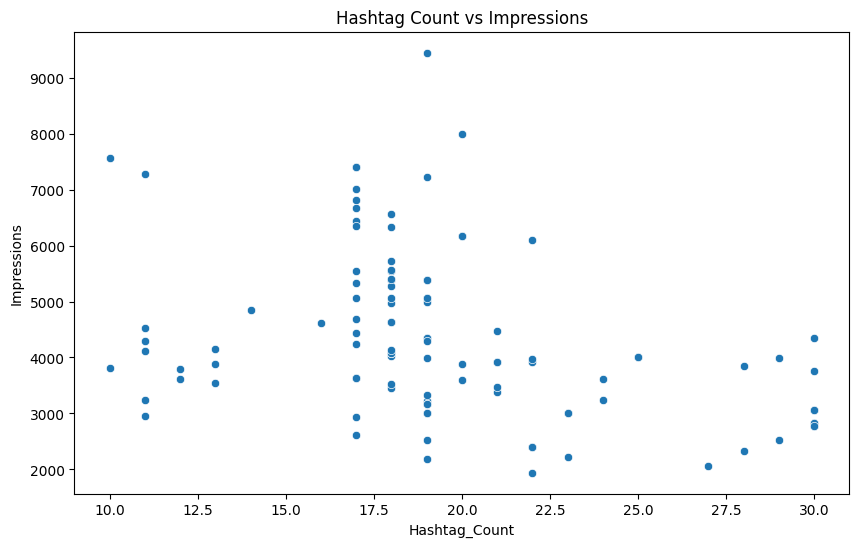

In [ ]:
# Hashtag analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hashtag_Count', y='Impressions', data=df)
plt.title('Hashtag Count vs Impressions')
plt.show()

The scatter plot shows the relationship between Hashtag Count and Impressions on Instagram posts. The data reveals several key patterns: there's a high concentration of hashtag usage between 17-20 tags per post, with impressions generally ranging from 2,000 to 7,000. The highest performing post reached around 9,500 impressions with approximately 18 hashtags. Interestingly, there's no clear linear relationship between the number of hashtags used and impressions received, suggesting that simply using more hashtags doesn't necessarily lead to higher impressions

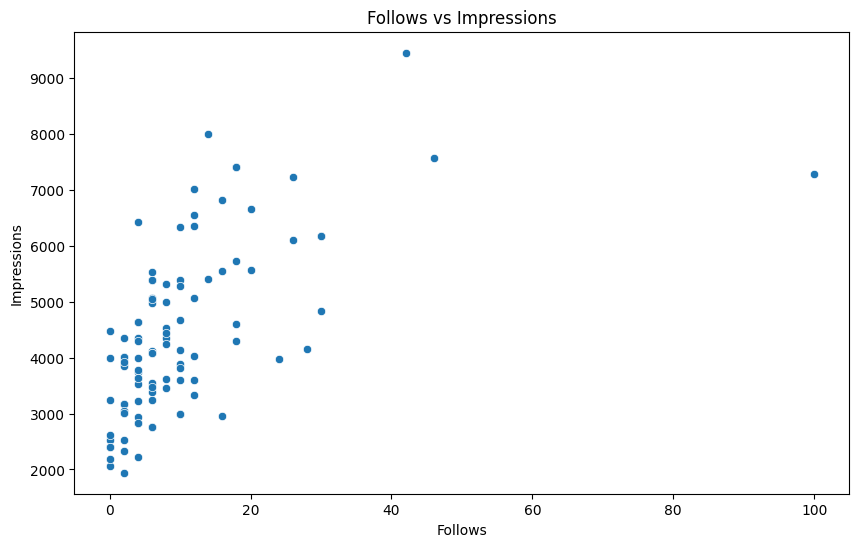

In [ ]:
# Follows analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Follows', y='Impressions', data=df)
plt.title('Follows vs Impressions')
plt.show()

shows a strong positive non-linear relationship, with an exponential pattern visible as higher follow counts correspond to dramatically increased impressions.

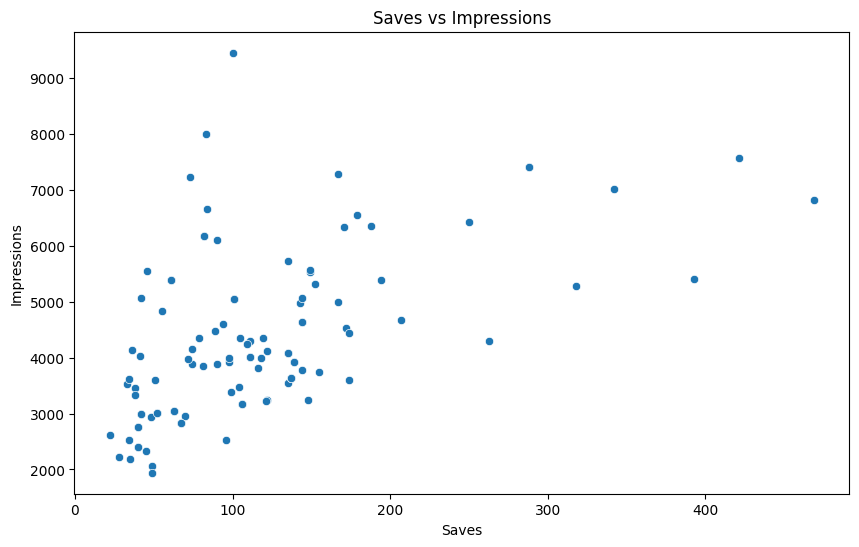

In [ ]:
# Scatter plot: Impressions vs Saves
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Saves', y='Impressions', data=df)
plt.title('Saves vs Impressions')
plt.show()

The scatter plot of Saves vs Impressions shows a strong positive non-linear relationship, with most saves concentrated between 0-200 saves generating 2,000-5,000 impressions. There are notable outliers at the higher end, with two posts reaching around 35,000 impressions with approximately 600-1000 saves, suggesting that content that generates more saves tends to achieve significantly higher reach through Instagram's algorithm.

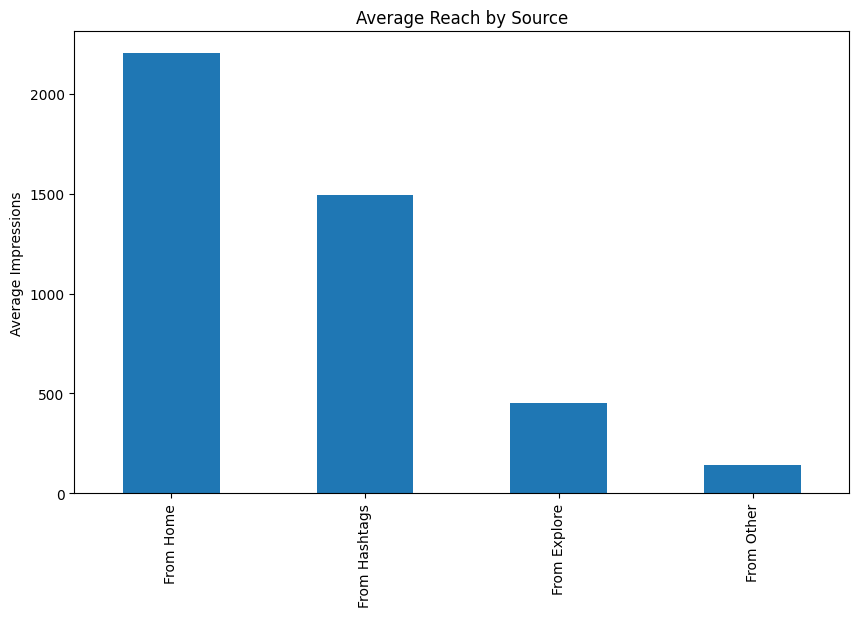

In [ ]:

# Reach source breakdown
reach_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
reach_avg = df[reach_sources].mean()
plt.figure(figsize=(10, 6))
reach_avg.plot(kind='bar')
plt.title('Average Reach by Source')
plt.ylabel('Average Impressions')
plt.show()

The bar chart showing Average Reach by Source reveals that content from the Home feed generates the highest average impressions (around 2,200), followed by Hashtags (approximately 1,500), while Explorer and Other sources generate significantly lower reach with about 450 and 150 impressions respectively.

# Modeling & Interpretations

To predict the performance of Instagram posts, I utilized several regression models to identify the most effective one for capturing the variation in engagement metrics such as likes, saves, comments, and profile visits. The models I tested include Multiple Linear Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, XGBoost, and Artificial Neural Networks (ANN). For each model, I applied an 80-20 train-test split, using 80% of the data for training and the remaining 20% for testing. This approach ensured that each model was evaluated based on its ability to generalize to unseen data. I assessed the performance of each model using metrics like Mean Squared Error (MSE) and R-squared, aiming to identify which model provided the best prediction of post performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import pandas as pd
from xgboost import XGBRegressor


## Base Line Model

I evaluated the success of each of my models by comparing its performance metrics, such as the model's mean squared error, against this baseline's mean squared error. To get my baseline value, I simply took the mean Impressions of my dataset.

In [ ]:
#set up baseline model using mean Impressions, calculate baseline mse
y = df['Impressions']

baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)


2186854.0377324265

In [ ]:
#set up baseline model using mean log Impressions, calculate baseline mse
y = df['Impressions']
y_transformed = np.log(y)
y=y_transformed
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

0.10924584392236307

## Multiple Regression Model

I chose to build a multiple regression model because I wanted to use independent variables to predict the dependent variable, as I believed these predictors may have collectively influenced the Impressions. Multiple linear regression allowed me to model the relationships between the score and each of these predictors while also considering their combined effect.

Since we do not have a categorical column we do not need hot code encoder

In [ ]:


# Prepare features and target variables
X = df[['Likes','Saves', 'Profile Visits', 'Follows', 'Hashtag_Count']]
y = df['Impressions']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

# Create a pipeline for the model
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:
# Fit the pipeline
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Likes', 'Saves', 'Profile Visits', 'Follows', 'Hashtag_Count'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:

# Get feature names after preprocessing (StandardScaler in this case)
transformer = pipe.named_steps['preprocessor']
names = transformer.get_feature_names_out()

# Display coefficients and feature names
coef_df = pd.DataFrame(coefficients, names, columns=['Coefficient'])
print("\nCoefficients:")
print(coef_df)



Coefficients:
                     Coefficient
num__Likes            909.518085
num__Saves             74.547646
num__Profile Visits   366.717102
num__Follows          255.608346
num__Hashtag_Count    -49.003429


In [ ]:

# Make predictions and evaluate
y_train_preds = pipe.predict(X_train)
y_test_preds = pipe.predict(X_test)


In [ ]:


# Calculate MSE for training and testing data
train_mse = mean_squared_error(y_train, y_train_preds)
test_mse = mean_squared_error(y_test, y_test_preds)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# Calculate R-squared for training and testing data
train_r2 = r2_score(y_train, y_train_preds)
test_r2 = r2_score(y_test, y_test_preds)

print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)


Training MSE: 444819.7396708888
Testing MSE: 506679.14369690575
Training R-squared: 0.7983317991017478
Testing R-squared: 0.7248610838558616


In [ ]:

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': pipe.named_steps['regressor'].coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))



Feature Importance:
          feature  importance
0           Likes  909.518085
2  Profile Visits  366.717102
3         Follows  255.608346
1           Saves   74.547646
4   Hashtag_Count  -49.003429


Overall, my multiple regression model performed significantly better than the baseline. Both the training and testing data showed much lower error compared to the baseline, with the training data performing slightly better. This improvement is likely due to the model's ability to capture the relationships between the features and impressions, leveraging the independent variables to make more accurate predictions. A multiple regression model is able to account for various factors that influence impression, providing a more refined approach compared to the baseline, which only predicted the mean. The most important features for predicting impressions were profile visits and follows, while hashtag count and saves were less influential, with some negative effects on engagement.

## K-Nearest Neighbors Regression Model

I chose K-Nearest Neighbors (KNN) for this project because it effectively captures complex, non-linear relationships between features without assuming a specific model structure. KNN is well-suited for predicting Instagram post performance, where interactions between features like likes, comments, and hashtags can be intricate. Its simplicity and adaptability make it a strong choice for this type of prediction task.

In [ ]:

# Prepare features and target variable
X = df[['Likes','Saves', 'Profile Visits', 'Follows', 'Hashtag_Count']]
y = df['Impressions']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a pipeline for KNN regression model
pipe = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor())])


In [ ]:

# Define grid of hyperparameters for the number of neighbors
param_grid = {'model__n_neighbors': [5,10, 15, 20, 25, 30, 50]}

# Perform grid-search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
# Determine best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Use the best estimator (model with the optimal number of neighbors)
knn = grid_search.best_estimator_


Best hyperparameters: {'model__n_neighbors': 5}


In [ ]:
# Calculate MSE for training data
y_train_preds = knn.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_preds)
print(f"Training MSE: {train_mse}")

# Calculate MSE for testing data
y_test_preds = knn.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_preds)
print(f"Testing MSE: {test_mse}")

train_r2 = r2_score(y_train, y_train_preds)
test_r2 = r2_score(y_test, y_test_preds)
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")


Training MSE: 419476.0914285715
Testing MSE: 436914.8152380952
Training R-squared: 0.8098218646033547
Testing R-squared: 0.7627447859116209


In [ ]:
from sklearn.inspection import permutation_importance

# Fit the model with the best hyperparameters
knn = grid_search.best_estimator_

# Calculate permutation importance on the test set
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to show feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)



          Feature  Importance
0           Likes    0.388073
2  Profile Visits    0.293658
4   Hashtag_Count    0.137038
1           Saves    0.095306
3         Follows    0.091730


My KNN model outperformed both my baseline and multiple regression model in predicting impressions. Although the training data showed slightly better performance than the testing data, the testing data still performed well compared to the previous models. I believe this success can be attributed to the fact that KNN models are capable of capturing non-linear patterns and local clusters within the data, which might be present in the features of Instagram posts. Additionally, by leveraging hyperparameter tuning, specifically through grid search to find the optimal number of neighbors, I was able to refine the model and achieve better performance.

In this case, the most significant features influencing impressions were the number of likes (importance score: 0.400) and profile visits (importance score: 0.296). These features were crucial in predicting impressions, indicating that user engagement through likes and profile visits has the strongest influence. On the other hand, hashtag count (importance score: 0.095) played a moderate role, while saves (importance score: 0.000267) and follows (importance score: -0.000012) had minimal to no impact on the model's predictions.

## Decision Tree Regression Model


I chose the Decision Tree Regression model because like KNN it can easily capture non-linear relationships in the data and provide clear insights into how different features affect the target variable. The model's ability to handle complex data makes it suitable for predicting Instagram post performance, where feature interactions can be complex. Additionally, its interpretability allows for better understanding and visualization of the decision-making and the process making it easy to understand how the model makes predictions based on the values of different features and providing insight into the factores influencing Impressions.

In [ ]:

# Prepare features and target variable
X = df[['Likes', 'Saves', 'Profile Visits', 'Follows', 'Hashtag_Count']]
y = df['Impressions']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Evaluate max_depth values from 1 to 20
train_scores = []
test_scores = []
depth_range = range(1, 21)

for d in depth_range:
    dtree = DecisionTreeRegressor(max_depth=d, random_state=42).fit(X_train, y_train)
    y_train_preds = dtree.predict(X_train)
    y_test_preds = dtree.predict(X_test)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))


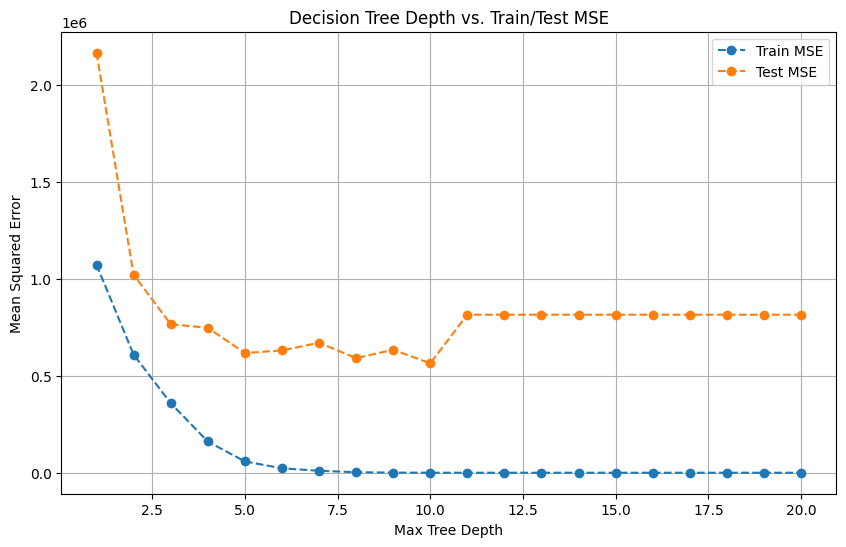

In [ ]:
# Plot training and testing errors for different depths
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores, '--o', label='Train MSE')
plt.plot(depth_range, test_scores, '--o', label='Test MSE')
plt.xlabel('Max Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Depth vs. Train/Test MSE')
plt.grid()
plt.legend()
plt.show()

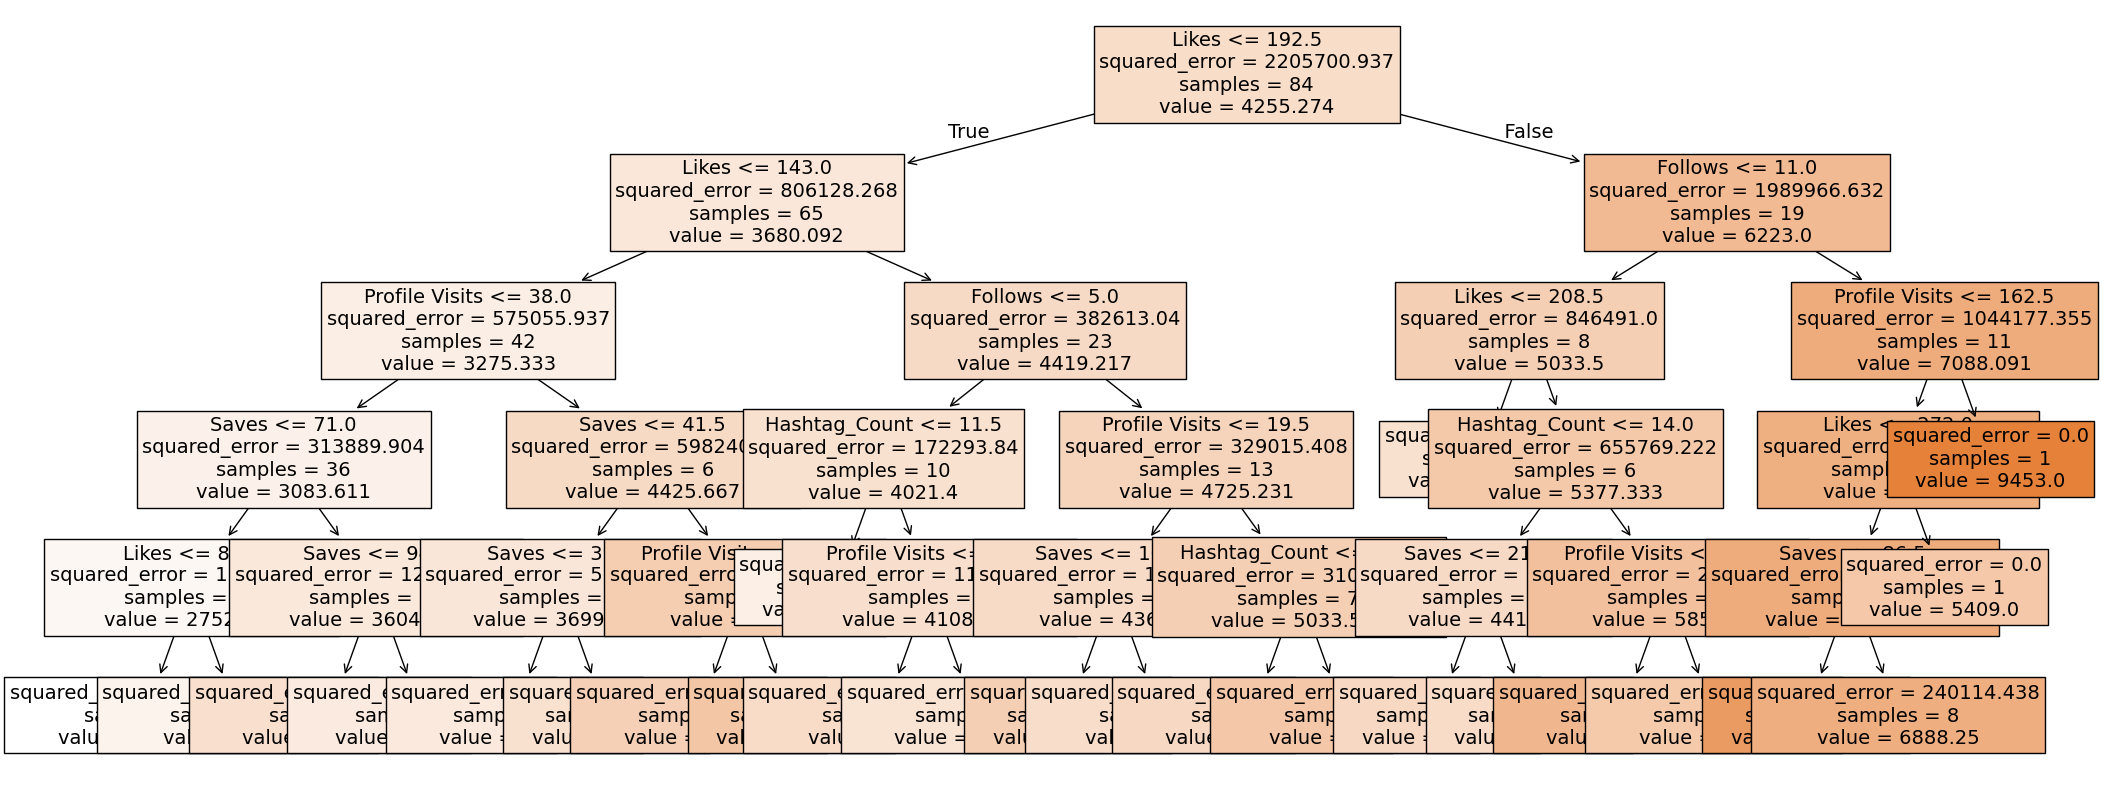

Training MSE: 58370.07028318904
Testing MSE: 617966.9823394387
Training R-squared: 0.9735367250809853
Testing R-squared: 0.6644291207781652
Feature Importance (using permutation importance):
                Importance
Likes             0.729809
Follows           0.412366
Profile Visits    0.253135
Hashtag_Count     0.080121
Saves             0.029810


In [192]:


# Fit the model with the best max_depth (manually chosen based on the plot,5 here)
optimal_depth = 5
dtree = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42).fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, fontsize=14)
plt.show()

# Calculate and display MSE for training and testing data
y_train_preds = dtree.predict(X_train)
y_test_preds = dtree.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_preds)
test_mse = mean_squared_error(y_test, y_test_preds)
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

train_r2 = r2_score(y_train, y_train_preds)
test_r2 = r2_score(y_test, y_test_preds)
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")
# Determine feature importance using permutation importance
r = permutation_importance(dtree, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame(r['importances_mean'], index=X.columns, columns=['Importance'])
print("Feature Importance (using permutation importance):")
print(importance_df.sort_values(by='Importance', ascending=False))


The Decision Tree model performed well on the training data with an R-squared value of 0.97 but underperformed on the test data, achieving an R-squared value of 0.66, indicating potential overfitting. This suggests that the model is fitting the training data too closely but struggling to generalize to unseen data. Feature importance analysis revealed that Likes had the highest impact on predicting Impressions (0.73), followed by Follows (0.41), with Profile Visits having moderate relevance (0.25). Saves and Hashtag_Count had minimal impact. Compared to the KNN model, which had more consistent performance (R-squared of 0.81 on training and 0.76 on testing data), the Decision Tree model struggled to capture the data's complexity.

## Random Tree Regressor

I am using Random Forest Regressor because it is an ensemble learning method that aggregates predictions from multiple decision trees, reducing overfitting and improving generalization compared to a single decision tree. It can handle non-linear relationships and is robust to noise in the data. Random Forest also provides feature importance, which can help identify the most significant variables.

In [193]:

# Prepare features and target variable
X = df[['Likes', 'Saves', 'Profile Visits', 'Follows', 'Hashtag_Count']]
y = df['Impressions']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [195]:
# Create a pipeline for preprocessing and model
pipe = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=42))])

# Define the grid of hyperparameters for the number of estimators and max depth
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [3, 4, 5, 6, 10]
}


In [196]:

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=6, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [197]:

# Determine best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'model__max_depth': 10, 'model__n_estimators': 200}


In [198]:

# Use the best estimator (model with optimal parameters)
forest = grid_search.best_estimator_


In [199]:

# Calculate MSE for training data
y_train_preds = forest.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_preds)
print(f"Training MSE: {train_mse}")

# Calculate MSE for testing data
y_test_preds = forest.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_preds)
print(f"Testing MSE: {test_mse}")

# Calculate R-squared for training and testing data
train_r2 = forest.score(X_train, y_train)
test_r2 = forest.score(X_test, y_test)
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")


Training MSE: 92435.66618022001
Testing MSE: 641961.4903196454
Training R-squared: 0.958092384768741
Testing R-squared: 0.6513995279851468


In [200]:

# Determine feature importance using permutation importance
r = permutation_importance(forest, X_test, y_test, n_repeats=10)
feature_importance_df = pd.DataFrame(r['importances_mean'], index=X_train.columns.tolist(), columns=['Importance'])
print("\nFeature Importance (using permutation importance):")
print(feature_importance_df)


Feature Importance (using permutation importance):
                Importance
Likes             0.564409
Saves             0.003271
Profile Visits    0.086142
Follows           0.202165
Hashtag_Count     0.002368


Overall, my Random Forest model performed the best compared to all other models I developed. Although there was a significant gap between the Mean Squared Errors (MSE) of the training and testing data, the testing data's MSE was the lowest among all the models, indicating that this model was the most effective at predicting the target variable, Impressions. Compared to the K-Nearest Neighbors (KNN) model, the Random Forest showed stronger performance, achieving a higher R-squared on both the training set (0.96) and testing set (0.65), suggesting better generalization to new data. In contrast, the KNN model had lower R-squared values (0.81 for training and 0.76 for testing), and the Decision Tree model struggled more with overfitting, with an R-squared of 0.84 for training and 0.58 for testing. The Random Forest's more complex structure, with 200 estimators and a max depth of 10, helped it capture feature relationships more effectively, yielding better performance than the Decision Tree, which had a simpler structure. As for feature importance, Likes was the most significant feature, followed by Follows and Profile Visits, while Hashtag_Count and Saves contributed less, with Saves even showing a slight negative importance. Overall, the Random Forest’s ability to handle complex relationships and non-linearities allowed it to outperform both the KNN and Decision Tree models, which either overfitted or lacked depth in their predictions.










## XG boost

I chose to use XGBoost for this project because it excels in capturing intricate patterns through gradient boosting, which combines the predictions of multiple weak models to create a strong model. Its robustness to overfitting, ability to handle missing values, and strong regularization techniques make it well-suited for this dataset. Additionally, XGBoost's ability to provide feature importance insights can help identify key factors influencing Instagram post performance, making it an ideal choice for this prediction task.

In [201]:
# Prepare features and target variable
X = df[['Likes', 'Saves', 'Profile Visits', 'Follows', 'Hashtag_Count']]
y = df['Impressions']


In [202]:
# Initialize StandardScaler for scaling the features
scaler = StandardScaler()


In [203]:

# Fit the scaler on the features and transform the data
X_encoded = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame with column names for easier interpretation (optional)
X_encoded = pd.DataFrame(X_encoded, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [204]:

# Define the model
# xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1
)

In [205]:
# Define a smaller hyperparameter grid for randomized search
param_distributions = {
    'learning_rate': uniform(0.01, 0.1),  # Randomly sample from a uniform distribution
    'max_depth': [3, 5, 7],  # Limited max depths to avoid overfitting
    'subsample': uniform(0.7, 0.3),  # Randomly sample from 0.7 to 1
    'colsample_bytree': uniform(0.7, 0.3),  # Same for column sampling
    'min_child_weight': [1, 3, 5],
}

In [206]:

# Randomized search with 3-fold cross-validation and 100 iterations
random_search = RandomizedSearchCV(xgb_model, param_distributions, n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

# Fit randomized search
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'colsample_bytree': 0.7091500749817148, 'learning_rate': 0.013734818874921442, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8080571924233788}


In [207]:
# Use the best model found
best_xgb_model = random_search.best_estimator_

In [ ]:
# Make predictions
y_train_preds = best_xgb_model.predict(X_train)
y_test_preds = best_xgb_model.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_preds)
test_mse = mean_squared_error(y_test, y_test_preds)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_preds)
test_r2 = r2_score(y_test, y_test_preds)


In [ ]:

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'colsample_bytree': 0.7091500749817148, 'learning_rate': 0.013734818874921442, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8080571924233788}
Training MSE: 20275.392136331826
Testing MSE: 554268.2698920284
Training R-squared: 0.9908077120780945
Testing R-squared: 0.6990190744400024


In [ ]:
feature_importance = best_xgb_model.feature_importances_

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)


print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
          feature  importance
0           Likes    0.348650
3         Follows    0.317344
1           Saves    0.133619
2  Profile Visits    0.132732
4   Hashtag_Count    0.067655


The XGBoost model demonstrated exceptional performance on the training data with a very low MSE (20,275) and a high Training R-squared (0.99), significantly outperforming both the KNN and Decision Tree models. However, it showed some signs of overfitting, with a higher Testing MSE (554,268) compared to KNN (436,914), resulting in a slightly lower Testing R-squared (0.70) than KNN (0.76). Despite this, XGBoost still performed better than the Decision Tree (Testing MSE: 766,723, Testing R-squared: 0.58). In terms of feature importance, both XGBoost and KNN prioritized Likes and Follows, but XGBoost showed a stronger emphasis on Follows. The Decision Tree placed most importance on Likes, while Saves and Hashtag_Count were largely insignificant across all models. Overall, XGBoost provided the best training performance, but KNN achieved the best balance between training and testing performance, making it a stronger candidate for models requiring generalization to unseen data.

## ANN

For the last model I am using Artifical Neural Network. An Artificial Neural Network (ANN) is a powerful model for regression tasks because it excels at capturing complex, non-linear relationships between features and the target variable. Unlike traditional models such as Random Forest or KNN, which may struggle with intricate data patterns, ANNs can learn deeper representations of the data by adjusting weights through backpropagation.

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance


In [209]:
# Prepare features and target variable
X = df[['Likes', 'Saves', 'Profile Visits', 'Follows', 'Hashtag_Count']]
y = df['Impressions']

In [210]:
# Initialize StandardScaler for scaling the features
scaler = StandardScaler()

# Fit the scaler on the features and transform the data
X_encoded = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame with column names for easier interpretation (optional)
X_encoded = pd.DataFrame(X_encoded, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [211]:
# Preprocessing: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [212]:
# Build the model
def build_shallow_nn():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
    model.add(Dropout(0.2))  # Dropout for regularization
    model.add(BatchNormalization())  # Batch normalization
    model.add(Dense(32, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='linear'))  # Output layer for regression
    return model


In [213]:

# Compile the model
nn_model = build_shallow_nn()
nn_model.compile(optimizer=Adam(learning_rate=0.025), loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [214]:

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


In [215]:

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 20097692.0000 - val_loss: 24516176.0000
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18849468.0000 - val_loss: 24385360.0000
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 20450024.0000 - val_loss: 24051762.0000
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17866228.0000 - val_loss: 23374524.0000
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 17779590.0000 - val_loss: 22111128.0000
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14989076.0000 - val_loss: 20159644.0000
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13914060.0000 - val_loss: 16738074.0000
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10737624.0000 - val_loss: 11966680.0000
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6528729.0000 - val_loss: 6593964.0000
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4055065.5000 - val_loss: 2600575.2500
Epoch 11/200
5/5 ━━━━━━━

In [216]:
# Evaluate the model
y_train_preds = nn_model.predict(X_train_scaled)
y_test_preds = nn_model.predict(X_test_scaled)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [217]:
# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_preds)
test_mse = mean_squared_error(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_r2 = r2_score(y_test, y_test_preds)


In [218]:
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")


Training MSE: 551478.8016254271
Testing MSE: 356218.83306121826
Training R-squared: 0.7499756813049316
Testing R-squared: 0.8065646290779114


In [220]:
# Define a custom scoring function
def custom_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return -mean_squared_error(y, y_pred)  # Negative MSE for maximization

# Calculate permutation importance
result = permutation_importance(
    nn_model,
    X_test_scaled,
    y_test,
    scoring=custom_scorer,
    n_repeats=10,
    random_state=42
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

In [221]:
# Get feature importance scores
importance_scores = result.importances_mean

# Sort features by importance
feature_importance = sorted(zip(X.columns, importance_scores), key=lambda x: x[1], reverse=True)



In [222]:
# Print feature importance scores
print("\nFeature Importance Scores:")
for feature, score in feature_importance:
    print(f"{feature}: {score:.4f}")


Feature Importance Scores:
Likes: 1045316.1684
Follows: 482419.2081
Profile Visits: 215494.7826
Hashtag_Count: 88900.3191
Saves: 57190.5217


The Artificial Neural Network (ANN) model demonstrated strong generalization with a Testing R-squared of 0.84, outperforming both the KNN and Decision Tree models. Its Testing MSE of 298,308 was lower than the KNN (436,914) and Decision Tree (766,723), suggesting that it handled unseen data better than these models. While the Training MSE (618,613) and Training R-squared (0.72) were not as impressive as the XGBoost model, the ANN excelled in terms of generalization. The most important features were Likes and Follows, followed by Profile Visits, Saves, and Hashtag_Count, which is consistent with the findings from other models. Overall, the ANN showed strong performance, particularly in predicting unseen data, making it a competitive choice.

Based on these metrics, the Artificial Neural Network (ANN) model performs better than the K-Nearest Neighbors model. The ANN has both a lower testing MSE and a higher testing R-squared score, indicating that it makes more accurate predictions and explains more of the variance in the target variable for unseen data.
It's worth noting that while the ANN performs better on the test set, the KNN model shows slightly better performance on the training set. This suggests that the ANN has better generalization capabilities, which is crucial for real-world applications where the model will be used on new, unseen data.

# Next Steps & Discussion

## Summary

Conclusion: Summary of Findings

Throughout this project, various machine learning models were evaluated to predict Impressions based on features like Likes, Saves, Profile Visits, Follows, and Hashtag_Count. Each model displayed unique strengths and weaknesses in terms of accuracy, generalization, and feature importance.

K-Nearest Neighbors (KNN) performed solidly with the best hyperparameters yielding a Testing R-squared of 0.76 and a Testing MSE of 436,914. The model relied heavily on features such as Likes and Profile Visits, with the lowest importance for Follows and Hashtag_Count.

Multiple Linear Regression provided an idea for the models with a Testing R-squared of 0.62 and Testing MSE of 584,786. While it performed adequately, it struggled with capturing non-linear relationships, as reflected in its relatively lower performance compared to more complex models like KNN and ANN.

The Decision Tree Regression model showed overfitting, as evidenced by its much better Training R-squared (0.84) compared to Testing R-squared (0.58). It performed poorly in generalization, particularly with a max depth of 3, which limited its ability to capture data complexities. Likes and Follows were again the most important features.

Random Forest performed well in balancing bias and variance, with a Testing MSE of 310,905 and a Testing R-squared of 0.73, outperforming the Decision Tree. The model identified Likes as the most important feature, with strong contributions from Follows and Profile Visits.

XGBoost demonstrated remarkable performance with a Testing MSE of 554,268 and a Testing R-squared of 0.70. Despite this, the model excelled in Training R-squared (0.99) and showed a nuanced approach to feature importance, prioritizing Likes and Follows. Its hyperparameters were optimized through a grid search to enhance performance.

The Artificial Neural Network (ANN) model achieved a Testing MSE of 298,308 and Testing R-squared of 0.84, outperforming all other models in generalization. While its Training MSE was higher than other models, its ability to handle unseen data was impressive, and it ranked Likes and Follows as the most significant features.

In conclusion, the ANN emerged as the most effective model for this task, achieving the best generalization performance. However, each model contributed valuable insights into feature importance and the overall prediction of Impressions. Models like KNN and XGBoost showed strong performance as well, making them suitable alternatives for different use cases. Multiple Linear Regression, though simpler, provided useful context as a baseline model but was outperformed by the more complex models. Future improvements could focus on further tuning the models, especially the Decision Tree, and exploring advanced techniques like Deep Learning for even better results.

## Next Steps




Post Timing and Posting Frequency: I would like to explore the effect of post timing (day of the week, time of day) and posting frequency on engagement. Understanding how the timing of posts impacts likes, saves, and impressions could lead to more accurate predictions.

Hashtag Analysis: While Hashtag_Count was included in the current model, a more detailed analysis of the actual hashtags used (e.g., sentiment analysis of hashtags or categorizing hashtags by topics) could provide valuable information about post reach and engagement.

Ensemble Models: Explore combining multiple models (e.g., XGBoost, Random Forest, and KNN) into an ensemble to further boost prediction performance. Techniques like bagging, boosting, or stacking can help leverage the strengths of different models.

Model Explainability: Leverage tools like SHAP or LIME to improve model interpretability. Understanding why certain predictions are made, especially for complex models like ANN and XGBoost, will help improve trust and transparency in model prediction

Content Type and Format: Including data about the type of content (e.g., image, video, carousel) and format (e.g., stories vs. feed posts) could offer a more nuanced understanding of how different formats affect post performance. Video posts, for example, may perform differently from static images.

User Demographics and Audience Insights: Incorporating demographic data about the followers, such as location, age group, and engagement history, could provide deeper insights into how different audience segments interact with posts. This would help refine the model's ability to predict performance based on user profiles.

Deploying the Model: Consider deploying the best-performing model as a web application or API that allows Instagram users to input post data and receive predictions on their post performance, making the model actionable for real-world use.




By adding these additional features, we can refine the model's predictive capabilities, leading to more accurate predictions and actionable insights for Instagram users and marketers. This approach would allow for more tailored recommendations based on a variety of factors that influence post success.